In [74]:
!wget https://raw.githubusercontent.com/rewerc/raw-files/main/titanic.csv

--2022-06-20 15:10:39--  https://raw.githubusercontent.com/rewerc/raw-files/main/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29474 (29K) [text/plain]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  28.78K  --.-KB/s    in 0.003s  

2022-06-20 15:10:39 (10.0 MB/s) - ‘titanic.csv.3’ saved [29474/29474]



In [75]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [77]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


In [78]:
print("Survived, any null? " + ("Yes" if df["Survived"].isnull().values.any() else "No"))
print("Pclass, any null? " + ("Yes" if df["Pclass"].isnull().values.any() else "No"))
print("Sex, any null? " + ("Yes" if df["Sex"].isnull().values.any() else "No"))
print("Age, any null? " + ("Yes" if df["Age"].isnull().values.any() else "No"))
print("SibSp, any null? " + ("Yes" if df["SibSp"].isnull().values.any() else "No"))
print("Parch, any null? " + ("Yes" if df["Parch"].isnull().values.any() else "No"))
print("Fare, any null? " + ("Yes" if df["Fare"].isnull().values.any() else "No"))

Survived, any null? No
Pclass, any null? No
Sex, any null? No
Age, any null? Yes
SibSp, any null? No
Parch, any null? No
Fare, any null? Yes


In [79]:
df[df["Age"].isnull()].count()

Survived    86
Pclass      86
Sex         86
Age          0
SibSp       86
Parch       86
Fare        86
dtype: int64

In [80]:
df[df["Fare"].isnull()].count()

Survived    1
Pclass      1
Sex         1
Age         1
SibSp       1
Parch       1
Fare        0
dtype: int64

In [81]:
df = df.dropna(axis=0) 
print("Survived, any null? " + ("Yes" if df["Survived"].isnull().values.any() else "No"))
print("Pclass, any null? " + ("Yes" if df["Pclass"].isnull().values.any() else "No"))
print("Sex, any null? " + ("Yes" if df["Sex"].isnull().values.any() else "No"))
print("Age, any null? " + ("Yes" if df["Age"].isnull().values.any() else "No"))
print("SibSp, any null? " + ("Yes" if df["SibSp"].isnull().values.any() else "No"))
print("Parch, any null? " + ("Yes" if df["Parch"].isnull().values.any() else "No"))
print("Fare, any null? " + ("Yes" if df["Fare"].isnull().values.any() else "No"))

Survived, any null? No
Pclass, any null? No
Sex, any null? No
Age, any null? No
SibSp, any null? No
Parch, any null? No
Fare, any null? No


In [82]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

Text(0, 0.5, 'Fare')

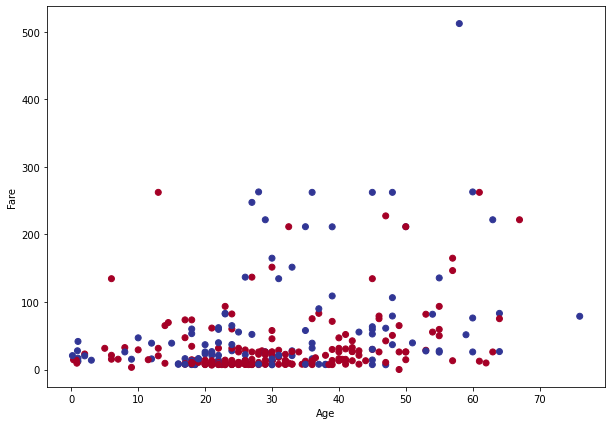

In [83]:
plt.figure(figsize=(10, 7))
plt.scatter(df["Age"], df["Fare"], c=df["Survived"], cmap=plt.cm.RdYlBu)
plt.xlabel("Age")
plt.ylabel("Fare")

In [84]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
364,1,female,25.0,1,0,55.4417
134,3,male,43.0,0,0,7.8958
383,3,female,19.0,1,0,16.1000
35,3,male,18.5,0,0,7.2292
103,3,male,26.0,0,0,7.7750
...,...,...,...,...,...,...
331,1,male,39.0,0,0,29.7000
360,3,male,14.5,8,2,69.5500
175,2,female,15.0,0,2,39.0000
320,3,male,26.0,0,0,7.7750


In [86]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "Fare", "Parch", "SibSp"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Pclass", "Sex"])
)
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'Fare', 'Parch', 'SibSp']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex'])])

In [87]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal[0]

array([0.32744296, 0.10266137, 0.        , 0.125     , 1.        ,
       0.        , 0.        , 1.        , 0.        ])

In [129]:
EPOCHS = 3
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics="accuracy")

history_1 = model_1.fit(X_train_normal, y_train, epochs=EPOCHS, verbose=0)

Text(0, 0.5, 'accuracy')

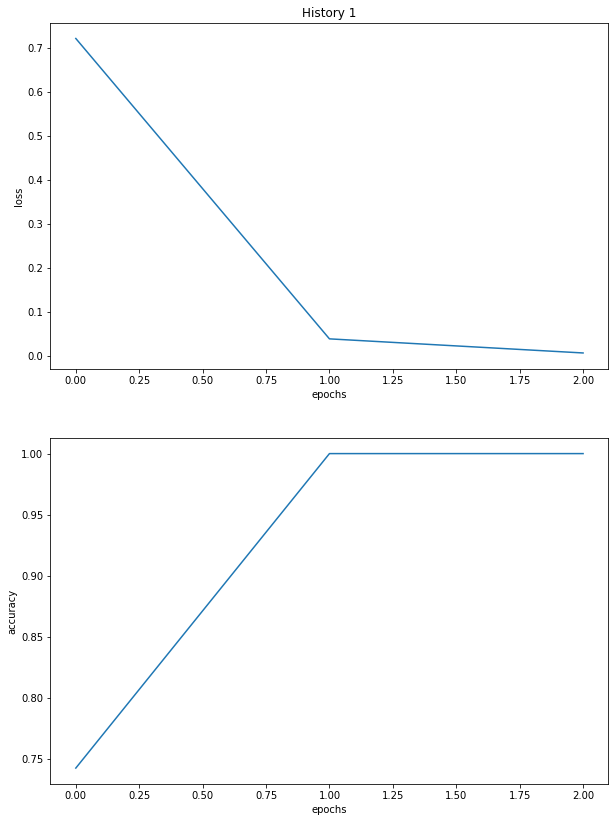

In [130]:
plt.figure(figsize=(10, 14))
plt.subplot(2, 1, 1)
plt.title("History 1")
plt.plot(np.arange(0, EPOCHS), history_1.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, EPOCHS), history_1.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [131]:
model_1.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014670210657641292, 1.0]